## Forecasting Stock Prices

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline


Bad key axes.color_cycle in file /Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/ourstyle.mplstyle, line 3 ('axes.color_cycle: 19e7d8, e719ca, 191ce7, 101011, e51919, f0f214, 48f214, 1af033')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2017')['Adj Close']
data.head()

,PG
Date,
2017-01-03,74.411263
2017-01-04,74.676392
2017-01-05,75.171272
2017-01-06,75.144768
2017-01-09,74.588020


In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2021-03-01,0.006134
2021-03-02,-0.003143
2021-03-03,-0.005990
2021-03-04,-0.008235
2021-03-05,0.027136


<AxesSubplot:xlabel='Date'>

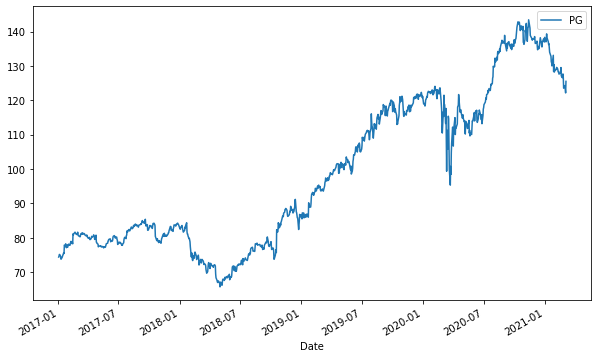

In [5]:
data.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

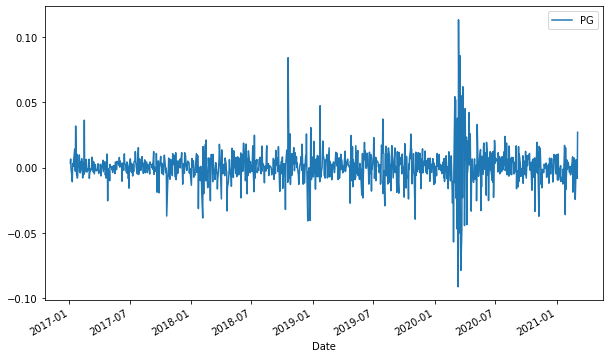

In [6]:
log_returns.plot(figsize=(10,6))

In [7]:
u = log_returns.mean()
u

PG    0.000498
dtype: float64

In [8]:
var = log_returns.var()

In [9]:
### Drift = mean - 0.5 * variance
drift = u - (0.5*var)
drift

PG    0.00041
dtype: float64

In [10]:
stdev = log_returns.std()
stdev

PG    0.01331
dtype: float64

In [11]:
### Brownian Motion r = drift + stdev * e^r

In [12]:
type(drift)

pandas.core.series.Series

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
np.array(drift)

array([0.00040978])

In [15]:
drift.values

array([0.00040978])

In [16]:
stdev.values

array([0.01331013])

In [17]:
norm.ppf(0.95)

1.6448536269514722

In [18]:
x = np.random.rand(10, 2)
x

array([[0.16241797, 0.77878498],
       [0.02024009, 0.77053733],
       [0.83392992, 0.26145648],
       [0.03365194, 0.69967375],
       [0.83473104, 0.07679948],
       [0.78255575, 0.43249592],
       [0.77544786, 0.36360734],
       [0.27313729, 0.57860093],
       [0.37980076, 0.02920515],
       [0.49733173, 0.73260257]])

In [19]:
norm.ppf(x)

array([[-0.98456877,  0.76809617],
       [-2.04881524,  0.74061758],
       [ 0.96981212, -0.63886162],
       [-1.82963933,  0.5234624 ],
       [ 0.97303097, -1.42693388],
       [ 0.78085379, -0.17002326],
       [ 0.75690916, -0.34883302],
       [-0.60335195,  0.19831562],
       [-0.3060041 , -1.89260587],
       [-0.00668842,  0.62070329]])

In [20]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.23266733, -0.7126771 ],
       [ 1.66843722,  0.26508747],
       [-0.05386183,  0.02334456],
       [ 0.22063262, -0.06451806],
       [ 0.73577993, -0.46679309],
       [-1.82690901,  0.88578777],
       [ 0.05318511,  0.29375053],
       [ 0.15554808,  0.41375116],
       [ 0.85040958,  1.36271539],
       [-1.0421315 ,  0.50588884]])

In [21]:
t_intervals = 1000
iterations = 10

#### daily return = e^r
#### r = drift + stdev * Z

In [22]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,10)))

In [23]:
df_daily_returns = pd.DataFrame(daily_returns)

<AxesSubplot:>

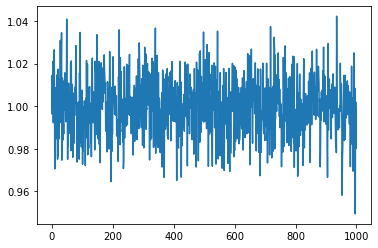

In [24]:
df_daily_returns[2].plot()

#### S{t+1} = S{t} * daily_return{t+1}

In [25]:
S0 = data.iloc[-1]
S0

PG    125.510002
Name: 2021-03-05 00:00:00, dtype: float64

In [26]:
# Initialise price list
price_list = np.zeros_like(daily_returns)

In [28]:
price_list[0]=S0

In [29]:
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [30]:
price_list

array([[125.51000214, 125.51000214, 125.51000214, ..., 125.51000214,
        125.51000214, 125.51000214],
       [126.21289235, 125.73199412, 127.31784291, ..., 125.84377767,
        122.6818013 , 127.05069862],
       [124.03269881, 128.75087414, 127.16875909, ..., 124.87697742,
        121.39011486, 128.57374256],
       ...,
       [333.95999285, 157.22544005, 102.68535339, ..., 235.51741686,
        191.18134321, 270.16318713],
       [339.38831726, 154.19691442, 100.64851613, ..., 234.17337059,
        188.46299429, 273.80714063],
       [341.30139112, 151.98796477, 100.8213306 , ..., 230.99133514,
        186.27666574, 269.55310716]])

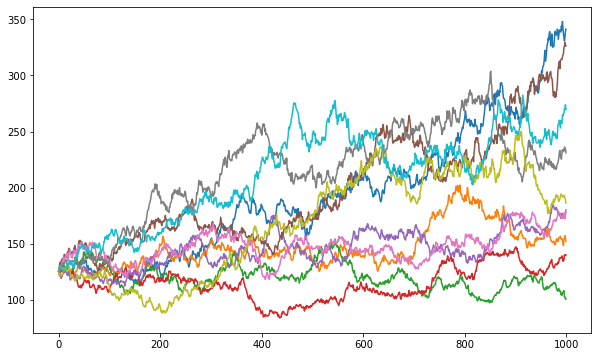

In [32]:
plt.figure(figsize=(10,6))
plt.plot(price_list);